,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


452 rows and 280 columns
452 rows and 275 columns
[0 1]
(452, 274)


c:\users\ren\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log
c:\users\ren\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in exp


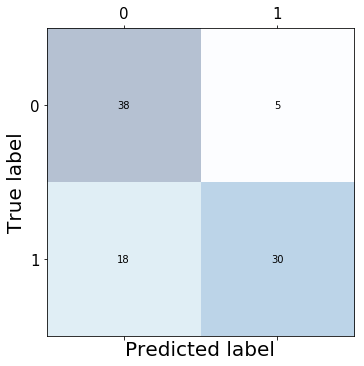

F1-score: 0.77 


In [33]:
%matplotlib inline

import pandas as pd
import numpy as np

#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))
np.unique(data[len(data.columns)-1])
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)
data.groupby(['arrhythmia']).size()
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))
data.head(3)
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
print(np.unique(y))
print(X.shape)

# splitting the dataset to training and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

class LogisticRegression(object):

    def __init__(self, eta=0.75, n_epoch=5000, random_state=1):
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate loss"""
        one = np.ones((output.shape))
        c = (-1)*np.dot(y, np.log(output))-np.dot((one-y), np.log(one-output))
        return c 
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return (1.0 / (1.0 + np.exp(-z)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) > 0, 1, 0)

    
lr = LogisticRegression()
lr.fit(X_train, y_train)
print()
y_pred = lr.predict(X_test)

#0 is positive
def f1_score(test, pred):
    
    p_predict_all = 0 #the number of examples predicted as 'positive'
    tp = 0 #true positive
    
    for i in range(pred.shape[0]):
        if pred[i] == 0:
            p_predict_all += 1
            if(test[i] == pred[i]):
                tp += 1
    
    p_true_all = 0 #the number of examples which are really positive
    for i in range(test.shape[0]):
        if test[i] == 0:
            p_true_all += 1
    
    pre = tp / p_predict_all
    rec = tp / p_true_all
    
    f1 = 2 * ((pre*rec)/(pre+rec))
    
    return f1

# plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

print('F1-score: %.2f ' % f1_score(y_test.values, y_pred))